In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
#from bs4 import BeautifulSoup

ModuleNotFoundError: No module named 'seaborn'

In [10]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB



In [12]:
train=pd.read_csv('mbti_1.csv')
#us=pd.read_csv('Users.csv')
#ps = pd.read_csv('ForumMessages.csv')
mbti ={'I':'Interoversion',
      'E': 'Exterovresion',
      'N':'Intutions',
      'S':'Sensing',
      'T':'Thinking',
      'F':'Feeling',
      'J':'Judging',
      'P':'Perceving'}

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(n_estimators=20, max_depth=4,n_jobs=-1)

In [13]:
tfidf=TfidfVectorizer(ngram_range=(1,1),stop_words='english')
tsvd=TruncatedSVD(n_components=10)
model=Pipeline([('tfidfi',tfidf),('tsvd1',tsvd),('etc',etc)])

In [14]:
train.shape

(8675, 2)

In [15]:
train.columns

Index(['type', 'posts'], dtype='object')

In [16]:
count=train['type'].value_counts()

In [17]:
#count

C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


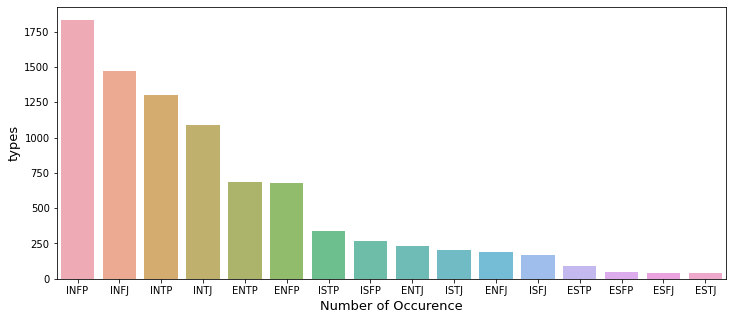

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(count.index,count.values,alpha=0.8)
plt.xlabel('Number of Occurence', fontsize=13)
plt.ylabel('types',fontsize=13)
plt.show()

In [19]:
from sklearn.model_selection import StratifiedKFold

In [20]:
kfolds = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

In [21]:
#np.random.seed(1)
#scoring ={'acc':'accuracy',
   #      'neg_log_loss':'neg_log_loss',
     #    'f1_micro':'f1_micro'}
#results =cross_validate(model, train['posts'],train['type'],cv=kfolds,scoring=scoring,n_jobs=-1)

In [22]:
#print("CV Accuracy :  {: 0.4f}(+/-  {:0.4f})".format(np.mean(results['test_acc']),np.std(results['test_acc'])))

In [23]:
def clean_text(text):
    text=BeautifulSoup(text,'lxml').text
    text = re.sub(r'http\s+',r'<URL>',text)
    text=re.sub(r'\|\|\|',r' ',text)
    return text

In [24]:
train['clean_posts']=train['posts'].apply(clean_text)

In [25]:
np.random.seed(1)
scoring ={'acc':'accuracy',
         'neg_log_loss':'neg_log_loss',
         'f1_micro':'f1_micro'}

tfidf1 = CountVectorizer(ngram_range=(-1,1), stop_words='english', lowercase= True, max_features=5000)

model_lr=Pipeline([('tfidf1',tfidf1),('lr',LogisticRegression(class_weight="balanced", C=0.005))])

results_lr =cross_validate(model_lr, train['clean_posts'],train['type'],scoring=scoring,n_jobs=-1)

In [27]:
print("CV Accuracy :  {: 0.4f}(+/-  {:0.4f})".format(np.mean(results_lr['test_acc']),np.std(results_lr['test_acc'])))

CV Accuracy :   0.6587(+/-  0.0151)


In [28]:
type(model_lr)

sklearn.pipeline.Pipeline

In [29]:
model_lr

Pipeline(steps=[('tfidf1',
                 CountVectorizer(max_features=5000, ngram_range=(-1, 1),
                                 stop_words='english')),
                ('lr', LogisticRegression(C=0.005, class_weight='balanced'))])

In [31]:
import pickle as pkl

In [32]:
filename = 'personality_model.sav'
pickle.dump(model_lr, open(filename, 'wb'))

In [43]:
X_test=train['clean_posts']

In [42]:
Y_test=train['type']

In [1]:
results_lr

NameError: name 'results_lr' is not defined